In [ ]:
# Dataset Source: https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Software Employee Salary analysis/salaries.csv')
df = data.copy()
df.drop(['Salaries Reported'], axis = 1, inplace=True)
df.head()

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,Bangalore,Full Time,Android


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Location           22770 non-null  object 
 5   Employment Status  22770 non-null  object 
 6   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating,Salary
count,22770.000000,2.277000e+04
mean,3.918213,6.953872e+05
std,0.519675,8.843990e+05
min,1.000000,2.112000e+03
25%,3.700000,3.000000e+05
50%,3.900000,5.000000e+05
75%,4.200000,9.000000e+05
max,5.000000,9.000000e+07


In [ ]:
print("Employment Status: ")
print(df['Employment Status'].unique())

print("\nLocation: ")
print(df['Location'].unique())

print("\nJob Title: ")
print(df['Job Title'].unique())

print("\nJob Roles: ")
print(df['Job Roles'].unique())

Employment Status: 
['Full Time' 'Intern' 'Contractor' 'Trainee']

Location: 
['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Jaipur' 'Kerala'
 'Kolkata' 'Madhya Pradesh' 'Mumbai']

Job Title: 
['Android Developer' 'Android Developer - Intern'
 'Android Developer - Contractor' ... 'Web Developer Contractor'
 'Full Stack Web Developer' 'Associate Web Developer']

Job Roles: 
['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']


In [ ]:
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695387
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


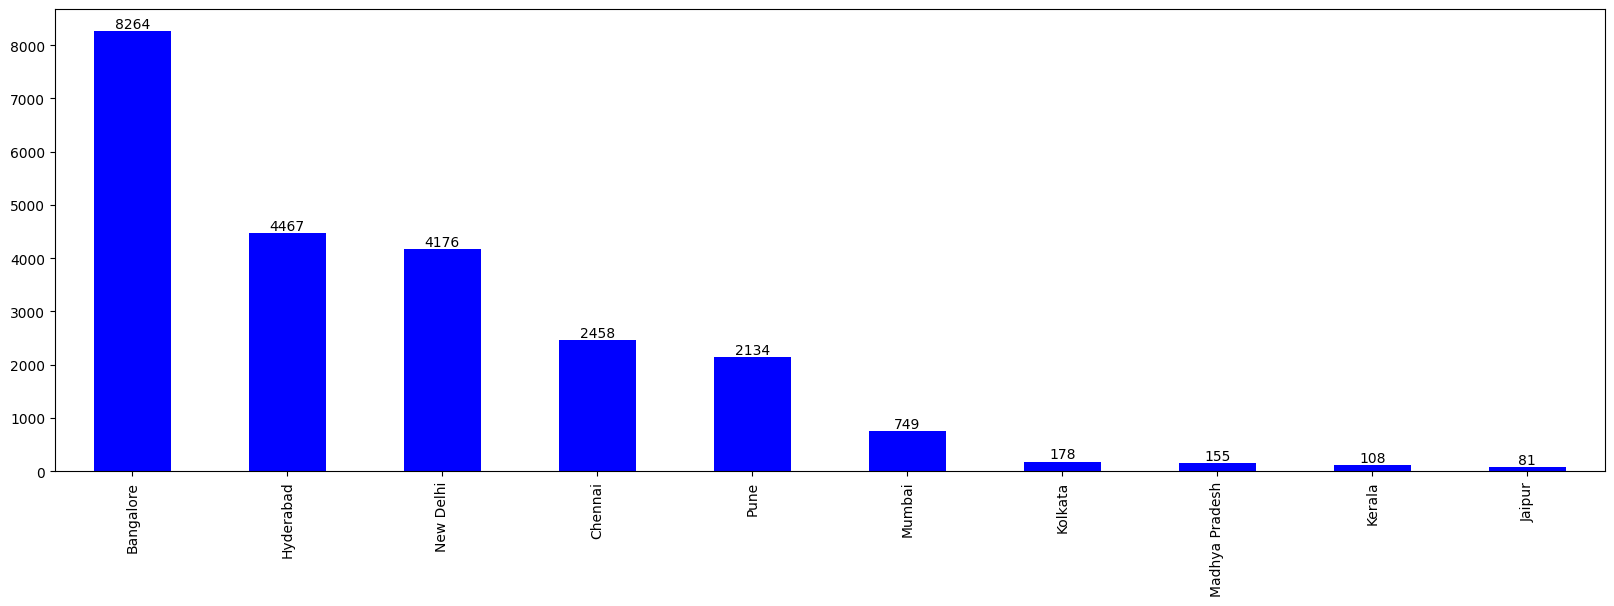

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 6))
ax = df.Location.value_counts().plot(kind = 'bar', color = 'blue')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

In [ ]:
# Source: https://www.numbeo.com/cost-of-living/country_result.jsp?country=India

citi_data = pd.read_csv('/content/drive/MyDrive/Software Employee Salary analysis/citi_index.csv')
cdf = citi_data.copy()
# cdf.drop('Rank', axis=1, inplace=True)
cdf.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Surat,24.0,13.1,18.8,25.0,16.5,34.4
1,2,Jaipur,23.8,5.1,14.8,22.8,16.8,40.3
2,3,Ahmedabad,25.4,7.7,16.9,26.5,19.7,43.2
3,4,Bhubaneswar,23.1,3.6,13.7,23.4,15.0,47.4
4,5,Madhya Pradesh,22.8,2.8,13.2,23.6,15.9,48.4


In [ ]:
c1 = 'Location'
c2 = 'City'

merged_df = pd.merge(df, cdf, left_on=c1, right_on=c2)
common_values = merged_df['City'].unique()

print("\nLocation: ")
print(df['Location'].unique())

print("Common cities available: ")
print(common_values)


Location: 
['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Jaipur' 'Kerala'
 'Kolkata' 'Madhya Pradesh' 'Mumbai']
Common cities available: 
['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Jaipur' 'Kerala'
 'Kolkata' 'Madhya Pradesh' 'Mumbai']


In [ ]:
merged_df.drop(['City'], axis=1, inplace=True)
merged_df.rename(columns={'Rating':'Job Rating','Rank':'City Rank'})
print(merged_df.shape)
print(df.shape)
merged_df.head()

(22770, 14)
(22770, 7)


,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,3.8,Sasken,Android Developer,400000,Bangalore,Full Time,Android,21,26.0,8.8,17.8,26.1,21.1,131.8
1,4.5,Advanced Millennium Technologies,Android Developer,400000,Bangalore,Full Time,Android,21,26.0,8.8,17.8,26.1,21.1,131.8
2,4.0,Unacademy,Android Developer,1000000,Bangalore,Full Time,Android,21,26.0,8.8,17.8,26.1,21.1,131.8
3,3.8,SnapBizz Cloudtech,Android Developer,300000,Bangalore,Full Time,Android,21,26.0,8.8,17.8,26.1,21.1,131.8
4,4.4,Appoids Tech Solutions,Android Developer,600000,Bangalore,Full Time,Android,21,26.0,8.8,17.8,26.1,21.1,131.8


In [ ]:
column_names = merged_df.columns.tolist()
column_names

# If you are interested in knowing how well an employee's salary can cover their living expenses in a specific city, the "Salary-to-Expenses Ratio" will be more relevant

#If you want to understand the relative purchasing power of an employee's salary compared to a reference city, then the "Salary-to-Purchasing Power Index" (LPPI) will be more appropriate.

['Rating',
 'Company Name',
 'Job Title',
 'Salary',
 'Location',
 'Employment Status',
 'Job Roles',
 'Rank',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

In [ ]:
merged_df['Total Expenses'] = merged_df['Cost of Living Index'] + merged_df['Rent Index'] + merged_df['Groceries Index'] + merged_df['Restaurant Price Index']
merged_df['Salary-to-Expenses Ratio'] = (merged_df['Salary'] / merged_df['Total Expenses']).map('{:.2f}'.format)
merged_df['Salary-to-Purchasing Power Ratio'] = (merged_df['Salary'] / merged_df['Local Purchasing Power Index']).map('{:.2f}'.format)
merged_df.drop(['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Cost of Living Plus Rent Index'], axis = 1, inplace=True)
merged_df

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles,Rank,Local Purchasing Power Index,Total Expenses,Salary-to-Expenses Ratio,Salary-to-Purchasing Power Ratio
0,3.8,Sasken,Android Developer,400000,Bangalore,Full Time,Android,21,131.8,82.0,4878.05,3034.90
1,4.5,Advanced Millennium Technologies,Android Developer,400000,Bangalore,Full Time,Android,21,131.8,82.0,4878.05,3034.90
2,4.0,Unacademy,Android Developer,1000000,Bangalore,Full Time,Android,21,131.8,82.0,12195.12,7587.25
3,3.8,SnapBizz Cloudtech,Android Developer,300000,Bangalore,Full Time,Android,21,131.8,82.0,3658.54,2276.18
4,4.4,Appoids Tech Solutions,Android Developer,600000,Bangalore,Full Time,Android,21,131.8,82.0,7317.07,4552.35
...,...,...,...,...,...,...,...,...,...,...,...,...
22765,3.9,Arun Patil,Jr Software Engineer Development in Test,228000,Mumbai,Full Time,SDE,9,52.2,92.6,2462.20,4367.82
22766,3.3,Hotstar,Software Development Engineer -2,2700000,Mumbai,Full Time,SDE,9,52.2,92.6,29157.67,51724.14
22767,3.8,CarWale,"Senior Developer, Software Development Enginee...",1500000,Mumbai,Full Time,SDE,9,52.2,92.6,16198.70,28735.63
22768,4.6,Heady,Software Development Engineer - II (IOS),900000,Mumbai,Full Time,IOS,9,52.2,92.6,9719.22,17241.38


In [ ]:
# Purchasing Capability

purchase_df = merged_df.sort_values(by='Salary-to-Purchasing Power Ratio', ascending=False)
purchase_df

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles,Rank,Local Purchasing Power Index,Total Expenses,Salary-to-Expenses Ratio,Salary-to-Purchasing Power Ratio
15109,3.2,Qvantel,Senior Test Engineer,684000,Hyderabad,Full Time,Testing,14,68.5,76.1,8988.17,9985.40
12125,3.0,Swaroop Agrochemical Industries,Senior Java Developer,684000,Hyderabad,Full Time,Java,14,68.5,76.1,8988.17,9985.40
15094,3.5,DXC Technology,Software Test Engineer,684000,Hyderabad,Full Time,SDE,14,68.5,76.1,8988.17,9985.40
14145,3.8,smartron India,Software Development Engineer-1,684000,Hyderabad,Full Time,SDE,14,68.5,76.1,8988.17,9985.40
12857,4.1,Tiruven Info Tech Software Solutions,Python/Django Developer,684000,Hyderabad,Full Time,Python,14,68.5,76.1,8988.17,9985.40
...,...,...,...,...,...,...,...,...,...,...,...,...
435,3.9,Arokia IT,Android Developer,132000,Bangalore,Full Time,Android,21,131.8,82.0,1609.76,1001.52
8227,4.7,SCIKEY,Web Developer,132000,Bangalore,Full Time,Web,21,131.8,82.0,1609.76,1001.52
7995,2.3,"Idera, Inc.",Web Developer,132000,Bangalore,Full Time,Web,21,131.8,82.0,1609.76,1001.52
21679,3.3,CareStack (Good Methods Global),Software Development Engineer (SDE1),696000,Kerala,Full Time,SDE,15,69.6,63.5,10960.63,10000.00


In [ ]:
# Living Expenses

expense_df = merged_df.sort_values(by='Salary-to-Expenses Ratio', ascending=False)
expense_df

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles,Rank,Local Purchasing Power Index,Total Expenses,Salary-to-Expenses Ratio,Salary-to-Purchasing Power Ratio
22031,3.8,Amazon,Software Development Engineer - Intern,924000,Mumbai,Intern,SDE,9,52.2,92.6,9978.40,17701.15
22580,4.4,Microsoft,Software Development Engineer In Test (SDET),924000,Mumbai,Full Time,SDE,9,52.2,92.6,9978.40,17701.15
22299,3.9,Tata Consultancy Services,Senior Software Development Engineer,924000,Mumbai,Full Time,SDE,9,52.2,92.6,9978.40,17701.15
9468,4.8,AB2 Consulting,Senior Java Developer,696000,Chennai,Full Time,Java,13,66.4,69.9,9957.08,10481.93
10584,3.3,Swaas Systems,Software Development Engineer In Test (SDET) C...,696000,Chennai,Contractor,SDE,13,66.4,69.9,9957.08,10481.93
...,...,...,...,...,...,...,...,...,...,...,...,...
16007,4.6,WebSpread Technologies,Android Developer,792000,New Delhi,Full Time,Android,11,63.8,79.1,10012.64,12413.79
16201,3.8,Cognizant Technology Solutions,Backend Developer,792000,New Delhi,Full Time,Backend,11,63.8,79.1,10012.64,12413.79
18798,3.4,myUpchar,Software Development Engineer I,792000,New Delhi,Full Time,SDE,11,63.8,79.1,10012.64,12413.79
18797,4.0,Treblo,Software Development Engineer I,792000,New Delhi,Full Time,SDE,11,63.8,79.1,10012.64,12413.79


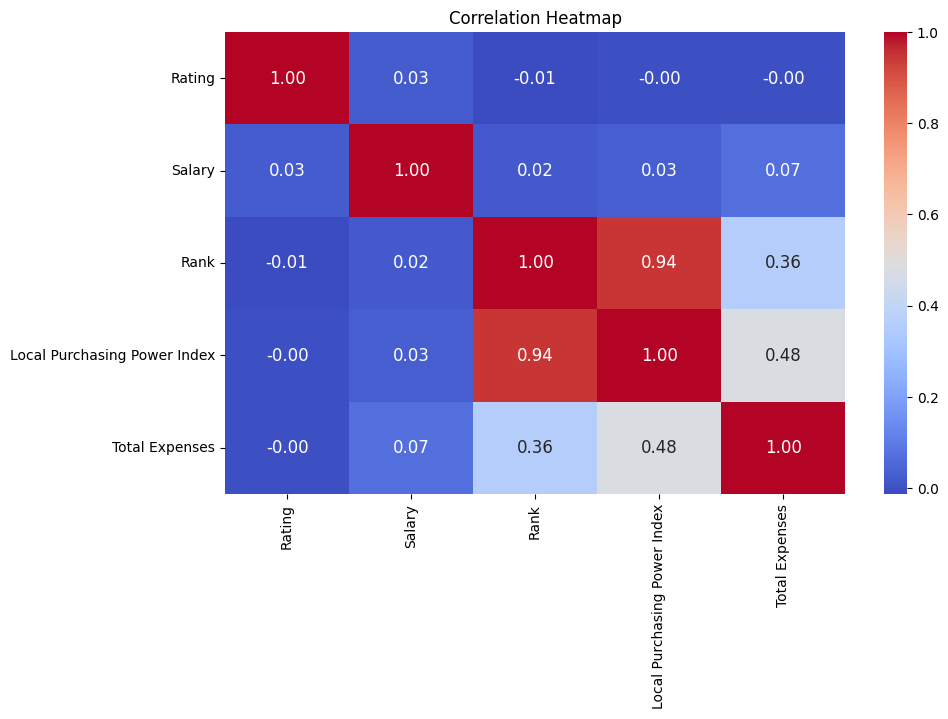

In [ ]:
# Select numeric columns only
numeric_df = merged_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()

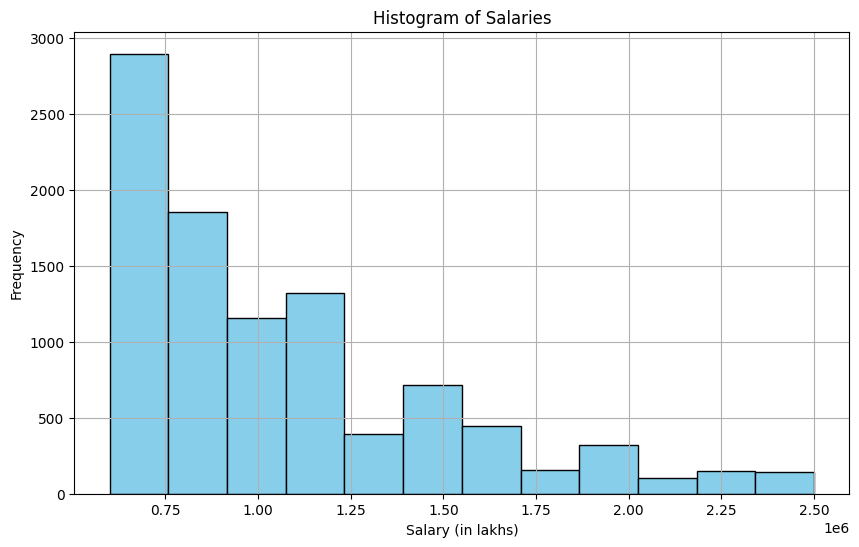

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Salary'], bins=12, range=(600000, 2500000), color='skyblue', edgecolor='black')
plt.xlabel('Salary (in lakhs)')
plt.ylabel('Frequency')
plt.title('Histogram of Salaries')
plt.grid(True)
plt.show()

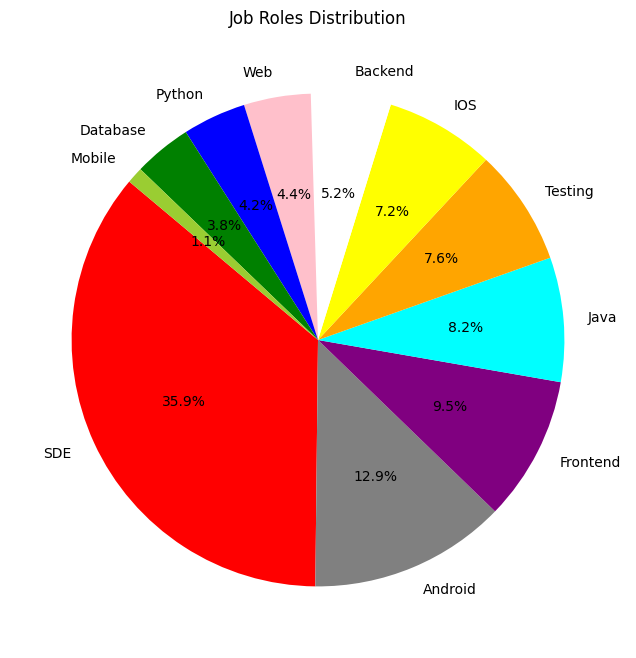

In [ ]:
job_title_counts = df['Job Roles'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['Red', 'Gray', 'Purple', 'Cyan', 'Orange', 'Yellow', 'White', 'Pink', 'Blue', 'Green', 'yellowgreen']
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Job Roles Distribution')
plt.show()

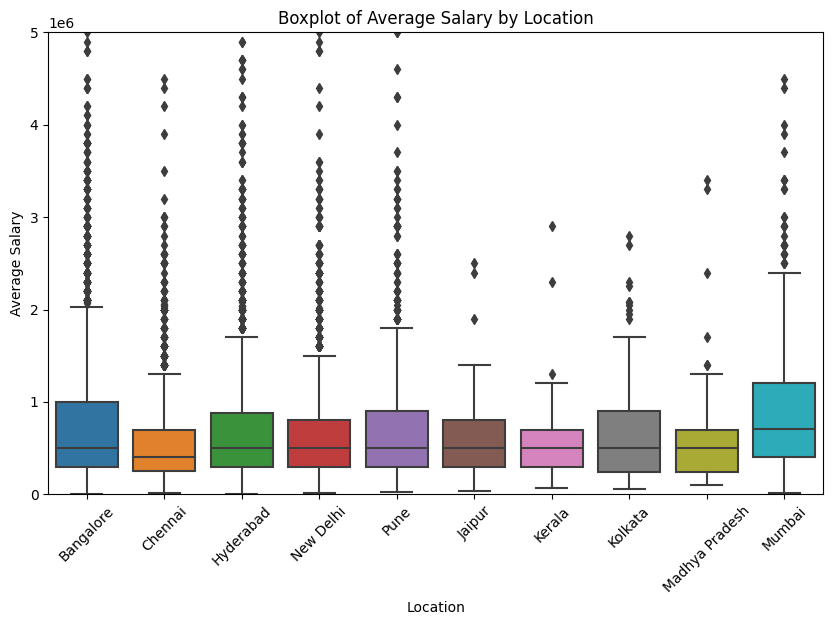

In [ ]:
average_salary_by_location = merged_df.groupby('Location')['Salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Salary', data=merged_df)
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Boxplot of Average Salary by Location')
plt.xticks(rotation=45)
plt.ylim(0,5000000)
plt.show()

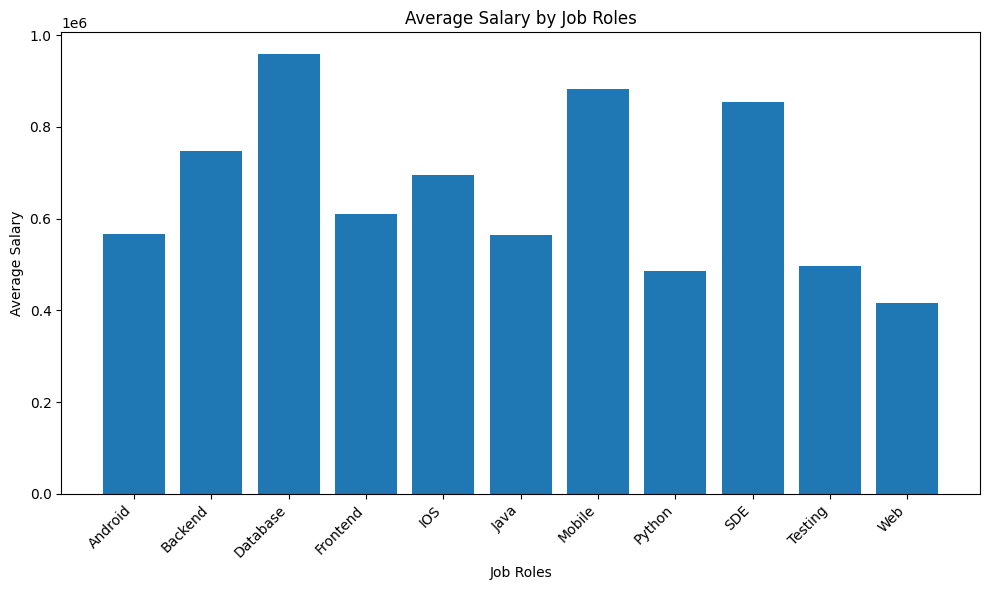

In [ ]:
average_salary_df = merged_df.groupby('Job Roles')['Salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_salary_df['Job Roles'], average_salary_df['Salary'])
plt.xlabel('Job Roles')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Roles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

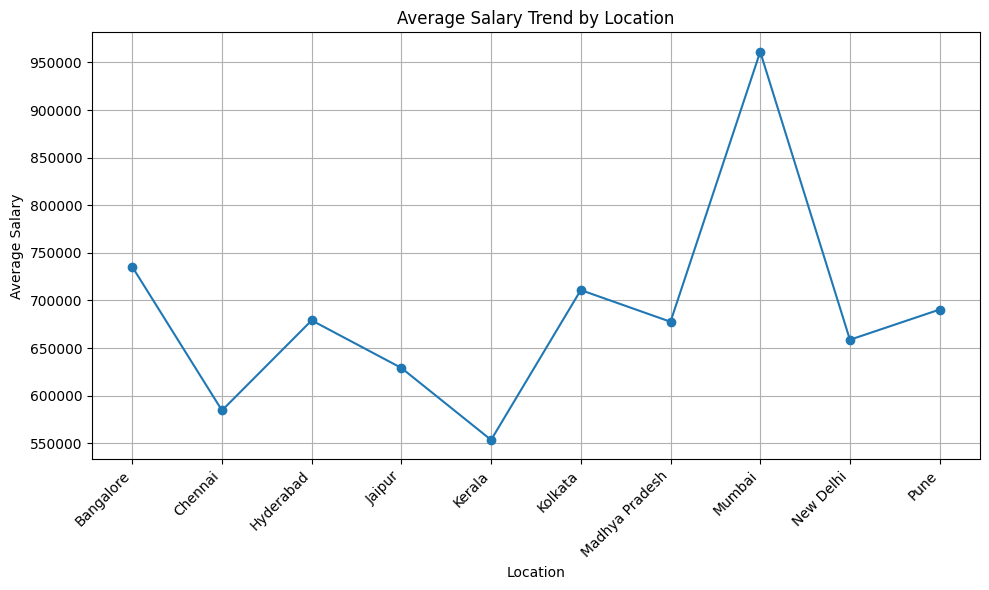

In [ ]:
df_sorted = merged_df.sort_values(by='Location')
average_salary_by_location = df_sorted.groupby('Location')['Salary'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_location.index, average_salary_by_location.values, marker='o', linestyle='-')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Average Salary Trend by Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
#http://salary-analysis.streamlit.app